In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import matplotlib.pyplot as pl
from meso_tools.io_utils import read_scanimage_metadata as get_meta
from meso_tools.io_utils import read_tiff, write_tiff
from meso_tools.stitch_full_field import *

In [7]:
### edit cell below to have correct session ID

path_to_tiff = r"D:\dev_data\FOV_01122023\FOV_beam2_00001.tif"

In [8]:
tiff_array = read_tiff(path_to_tiff)

meta = get_meta(path_to_tiff)

ff_meta_dict = read_full_field_meta(meta)

ff_meta_dict = check_meta(ff_meta_dict)

<tifffile.TiffFile 'FOV_beam2_00001.tif'> asarray failed to reshape (75, 9080, 128) to (37, 2, 9080, 128)


AssertionError: More than 1 channel is set ot be saved when data acquired, unable to split

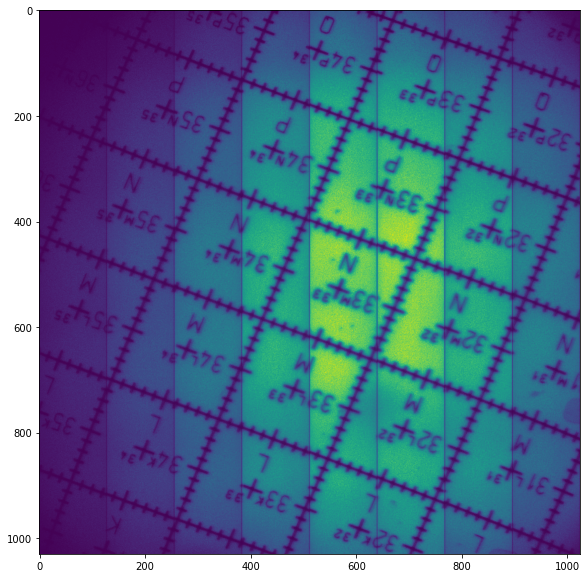

In [9]:
output_tiff_shape, gap = check_tiff(tiff_array, ff_meta_dict)

ff_averaged_tiff = average_tiff(tiff_array, ff_meta_dict)

ff_stitched_tiff, ff_meta_dict = stitch_tiff(ff_averaged_tiff, ff_meta_dict, gap, output_tiff_shape)

path_to_stitched_tiff = r"D:\dev_data\FOV_01122023\FOV_beam2_stitched.tif"

write_tiff(path_to_stitched_tiff, ff_stitched_tiff)

pl.figure(figsize =[10,10])
pl.imshow(ff_stitched_tiff)